# Izračuni

V tem zvezku bodo narejeni nekateri izračuni, povezani s cilji projektne naloge

In [8]:
import random
import matplotlib.pyplot as plt

# za 3D risanje
from mpl_toolkits.mplot3d import Axes3D 

from kvadrat import razdalja, Kvadrat, Kocka

# spreminjanje velikosti grafov
plt.rcParams['figure.figsize'] = [10, 10]    # če grafi preveliki, pomanjšaj ti dve števili

## Dolžina drevesa najkrajših poti

Kako se spreminja dolžina drevesa, ko spreminjamo število točk in največjo dovoljeno razdaljo?

In [2]:
def dolzina_drevesa_tocke(max_st_tock=50, max_razdalja=0.3):
    """
    Maksimalno dovoljeno razdaljo 'r' vzamemo za dano in pogledamo, 
    kako se spreminja skupna dolžina drevesa najkrajših poti, ko 
    imamo med eno in 'max_st_tock' točk.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    tocke = []    
    dolzine = []
    
    # pogledamo različna števila točk
    for i in range(1, max_st_tock + 1):
        a = Kvadrat(i, max_razdalja)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        tocke.append(i)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
            
    return tocke, dolzine
    

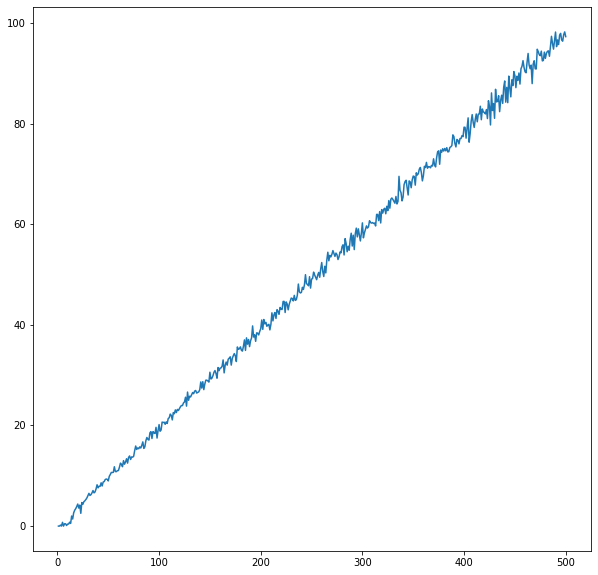

In [3]:
# narišemo dolžino v odvisnosti od števila točk

tocke, dolzine = dolzina_drevesa_tocke(500, 0.3)

plt.plot(tocke, dolzine);

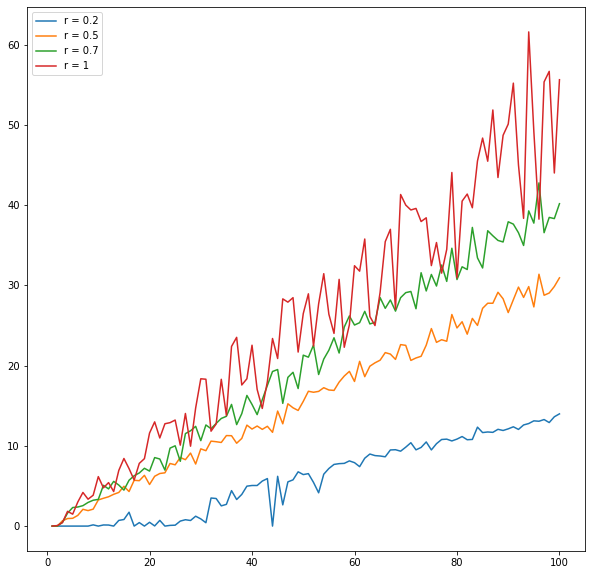

In [4]:
# izberemo nekaj možnih največjih razdalj in opazujemo, kaj se dogaja z dolžino drevesa

tocke1, dolzine1 = dolzina_drevesa_tocke(100, 0.2)
tocke2, dolzine2 = dolzina_drevesa_tocke(100, 0.5)
tocke3, dolzine3 = dolzina_drevesa_tocke(100, 0.7)
tocke4, dolzine4 = dolzina_drevesa_tocke(100, 1)

plt.plot(tocke1, dolzine1, label='r = 0.2');
plt.plot(tocke2, dolzine2, label='r = 0.5');
plt.plot(tocke3, dolzine3, label='r = 0.7');
plt.plot(tocke4, dolzine4, label='r = 1');
plt.legend();

In [5]:
def dolzina_drevesa_razdalja(st_tock=100, najmanj=0.1, najvec=0.9):
    """
    Vzamemo število točk za dano in gledamo, kako se spreminja skupna dolžina 
    drevesa najkrajših poti, ko spreminjamo največjo dovoljeno razdaljo od 
    'min_razdalja' do 'max_razdalja'.
    """
    # gradimo seznama točk in dolžin pri tem številu točk
    maxi = []    
    dolzine = []
    
    trenutna = najmanj
    
    while trenutna <= najvec:
        a = Kvadrat(st_tock, trenutna)
        oddaljenost, oce = a.drevo_najkrajsih_poti()
        
        maxi.append(trenutna)
        
        dolzina = 0
        for ata in oce:
            if oce[ata] is not None:
                dolzina += razdalja(ata, oce[ata])
        
        dolzine.append(dolzina)
        trenutna += 0.005
            
    return maxi, dolzine

CPU times: user 29.2 s, sys: 168 ms, total: 29.3 s
Wall time: 29.6 s


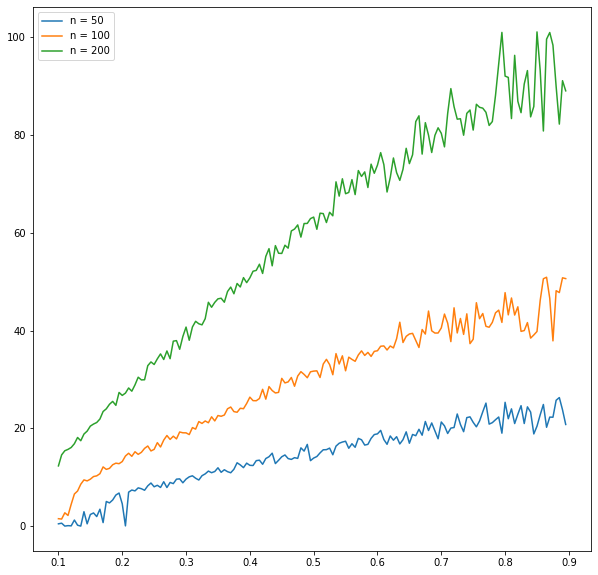

In [6]:
%%time

maxi1, dolzine1 = dolzina_drevesa_razdalja(50)
maxi2, dolzine2 = dolzina_drevesa_razdalja(100)
maxi3, dolzine3 = dolzina_drevesa_razdalja(200)

plt.plot(maxi1, dolzine1, label='n = 50');
plt.plot(maxi2, dolzine2, label='n = 100');
plt.plot(maxi3, dolzine3, label='n = 200');
plt.legend();

CPU times: user 15.5 s, sys: 76.2 ms, total: 15.6 s
Wall time: 15.7 s


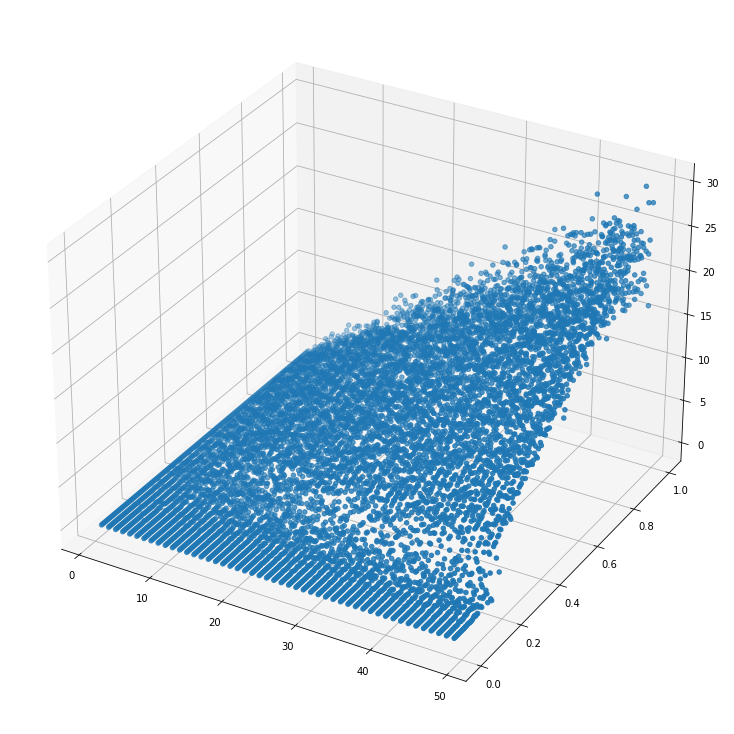

In [23]:
%%time

# kaj se zgodi če opazujemo spreminjanje obeh parametrov hkrati

# definiramo prazne sezname - to bodo koordinate točk
nji = []
maxiji = []
dolzineji = []

# spreminjamo število točk in kličemo zgornjo funkcijo
for n in range(1, 50):
    
    # izračunamo dolžine
    
    maxi, dolzine = dolzina_drevesa_razdalja(n, 0, 1)
    
    nji += [n for i in range(int(1/0.005))]
    maxiji += maxi
    dolzineji += dolzine
    
fig = plt.figure()
ax = Axes3D(fig)


ax.scatter(nji, maxiji, dolzineji)

    

## Vsota dolžin od korena do ostalih

Ponovno opazujemo ob spreminjanju števila točk in največje razdalje.